In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

In [2]:
def f(z, a, c, p):
    return - np.sum([c[i] * np.exp(- np.sum([a[i,j] * (z[j] - p[i,j])**2 for j in range(3)])) for i in range(4)])

def gradient(z, a, c, p):
    gz = np.zeros(3)
    for i in range(4):
        sum_exponent = -np.sum([a[i][j]*(z[j]-p[i][j])**2 for j in range(3)])
        for j in range(3):
            gz[j] += c[i] * np.exp(sum_exponent) * 2*a[i][j] * (z[j]-p[i][j])
    return gz

def box_projection(z):
    z1, z2, z3 = z
    return min(max(z1, 0), 1), min(max(z2, 0), 1), min(max(z3, 0), 1)

def GD(z, a, c, p, T, gamma):
    xi = np.array([z])
    for i in range(1, T):
        z = z - gamma * gradient(z, a, c, p)
        for j in range(3):
            if z[j] > 1 or z[j] < 0: 
                print(f"Gradient descent out of boundary at step {i}. Terminating.")
                return xi
        xi = np.append(xi, [z], axis=0)
    return xi

def SGD(z, a, c, p, T, gamma):
    xi = np.array([z])
    for i in range(1, T):
        z = box_projection(z - gamma * gradient(z, a, c, p))
        xi = np.append(xi, [z], axis=0)
    return xi

def plot_descent(xi, ax):
    fig = plt.figure() 
    ax.view_init(30, 50)

    # descent
    ax.plot3D(xi[:,0],xi[:,1],xi[:,2], '.-r', label="Points")
    ax.plot3D(xi[-1,0],xi[-1,1],xi[-1,2], '.b', label="Final point")
    ax.text(xi[-1,0],xi[-1,1],xi[-1,2], f"({round(xi[-1,0], 2)}, {round(xi[-1,1], 2)}, {round(xi[-1,2], 2)})")
    # boundary box
    up = np.array([[0,1], [1,1], [1,0], [0,0], [0,1]])

    ax.plot3D(up[:,0], up[:,1], 1, color='black')
    ax.plot3D(up[:,0], up[:,1], 0, color='black')

    ax.plot3D(np.ones(5), up[:,0], up[:,1], color='black')
    ax.plot3D(np.zeros(5), up[:,0], up[:,1], color='black')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz']); ax.set_box_aspect(np.ptp(limits, axis = 1))

def create_subplots(z1, a, c, p, T, gamma):
    fig = plt.figure(figsize=(14,14))
    xi_gd = GD(z1, a, c, p, T, gamma)
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    plot_descent(xi_gd, ax1)

    xi_sgd = SGD(z1, a, c, p, T, gamma)
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    plot_descent(xi_sgd, ax2)

    print(f'With initial point: ({z1[0]}, {z1[1]}, {z1[2]})')
    print(f'Learning rate: {gamma}')
    print(f'and {T} timesteps.')
    print(f'Gradient descent final point value: {f(xi_gd[-1], a, c, p)}')
    print(f'Projected gradient descent final point value: {f(xi_sgd[-1], a, c, p)}\n')
    print(f'Where minimal value of f is approximately −3.86278214782076')

    values_gd = []
    values_sgd = []
    for xi in xi_gd:
        values_gd.append(f(xi, a, c, p))

    for xi in xi_sgd:
        values_sgd.append(f(xi, a, c, p))

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(range(len(values_gd)), values_gd, '.-', label="Gradient descent")

    ax3.set_xlim(0, len(values_sgd))

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(range(len(values_sgd)), values_sgd, '.-', label="Projected gradient descent")
    ax4.sharey(ax3)

    ax1.set_title("Gradient descent")
    ax2.set_title("Projected gradient descent")
    ax3.set_ylabel("f value for each step", size='large')
    ax3.set_xlabel("timesteps")
    ax4.set_xlabel("timesteps")
    ax1.legend()
    ax2.legend()

In [3]:
a = np.array([[3.0, 10, 30], [0.1, 10, 35], [3.0, 10, 30], [0.1, 10, 35]])
c = np.array([1, 1.2, 3, 3.2])
p = np.array([[0.36890, 0.117, 0.2673], [0.4699, 0.4387, 0.747], [0.1091, 0.8732, 0.5547], [0.03815, 0.5743, 0.8828]])

# minimal value is at point (0.22, 0.56, 0.85) approximately

Example where gradient descent terminates on step 4 because it goes out of boundary. Projected gradient descent still finds a really small value despite reltively large learning rate.

Gradient descent out of boundary at step 4. Terminating.
With initial point: (0.3, 0.3, 0.3)
Learning rate: 0.1
and 100 timesteps.
Gradient descent final point value: -1.0940190881661676
Projected gradient descent final point value: -3.8120884191099402

Where minimal value of f is approximately −3.86278214782076


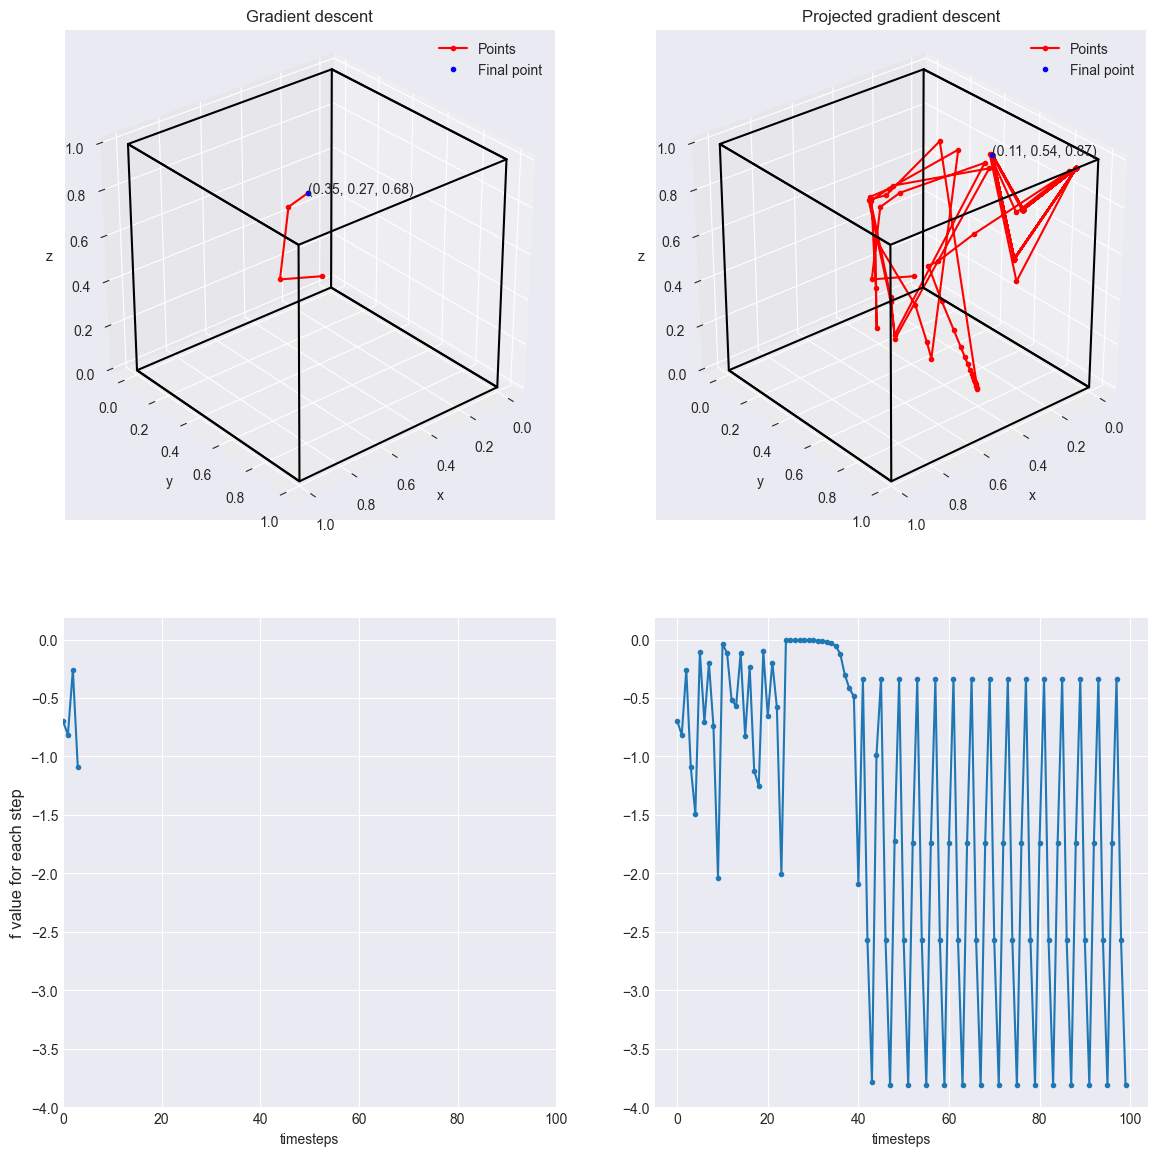

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
z1 = np.array([0.3,0.3,0.3])
gamma = 0.1
T = 100

create_subplots(z1, a, c, p, T, gamma)

Example where both descents get stuck at a point that is not minimal value.

With initial point: (0.5, 0.5, 0.1)
Learning rate: 0.01
and 100 timesteps.
Gradient descent final point value: -1.000816022029655
Projected gradient descent final point value: -1.000816022029655

Where minimal value of f is approximately −3.86278214782076


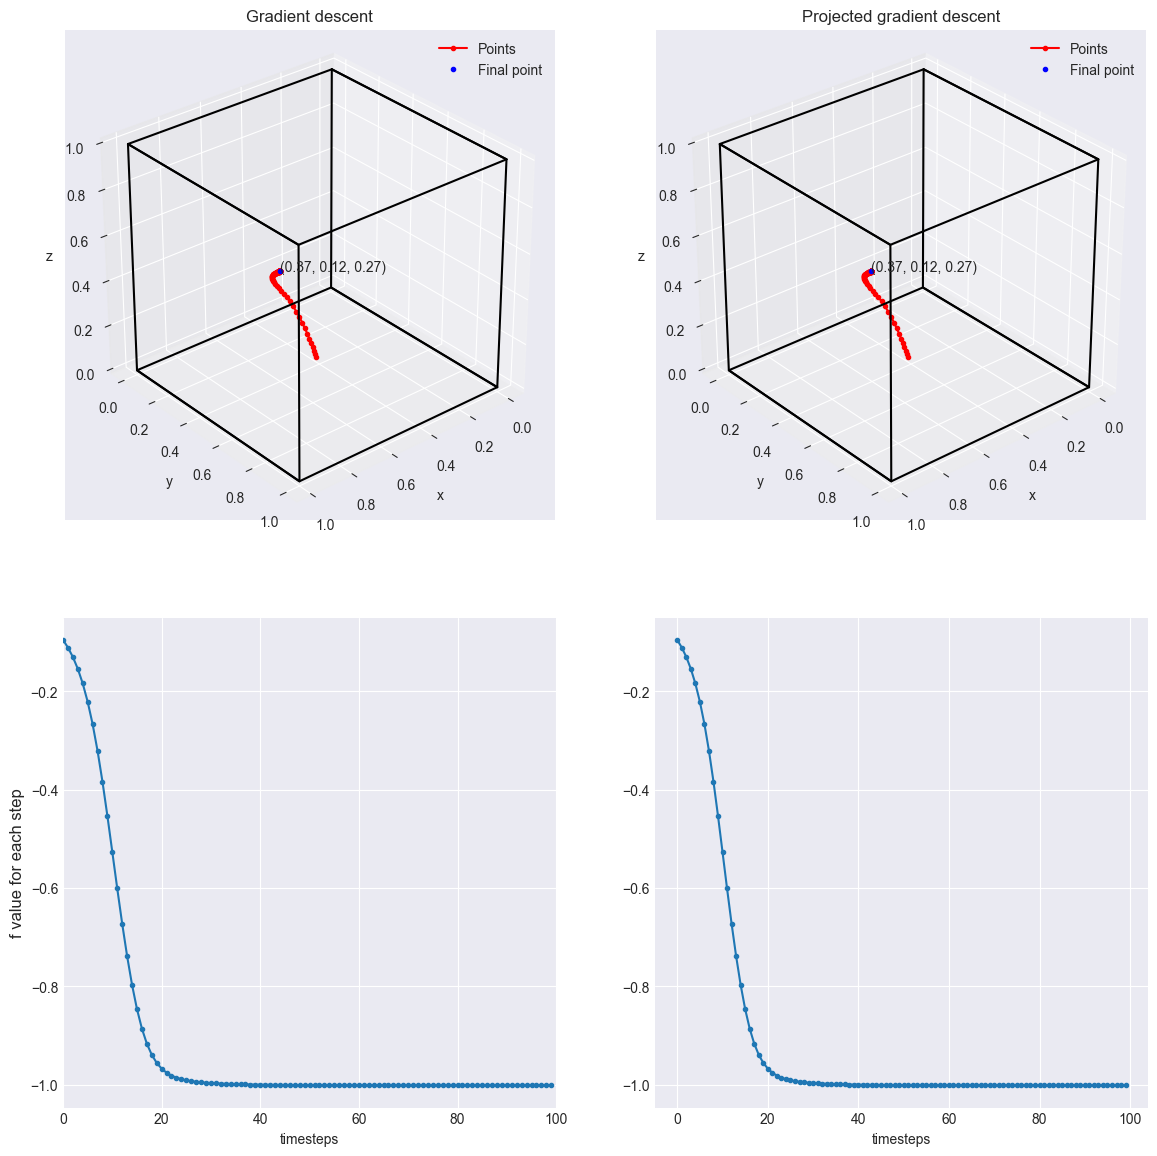

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
z1 = np.array([0.5,0.5,0.1])
gamma = 0.01
T = 100

create_subplots(z1, a, c, p, T, gamma)

Getting as close to the minimal value of f with 2000 steps and good initial point.

With initial point: (0.22, 0.56, 0.85)
Learning rate: 0.001
and 2000 timesteps.
Gradient descent final point value: -3.8627282770985913
Projected gradient descent final point value: -3.8627282770985913

Where minimal value of f is approximately −3.86278214782076


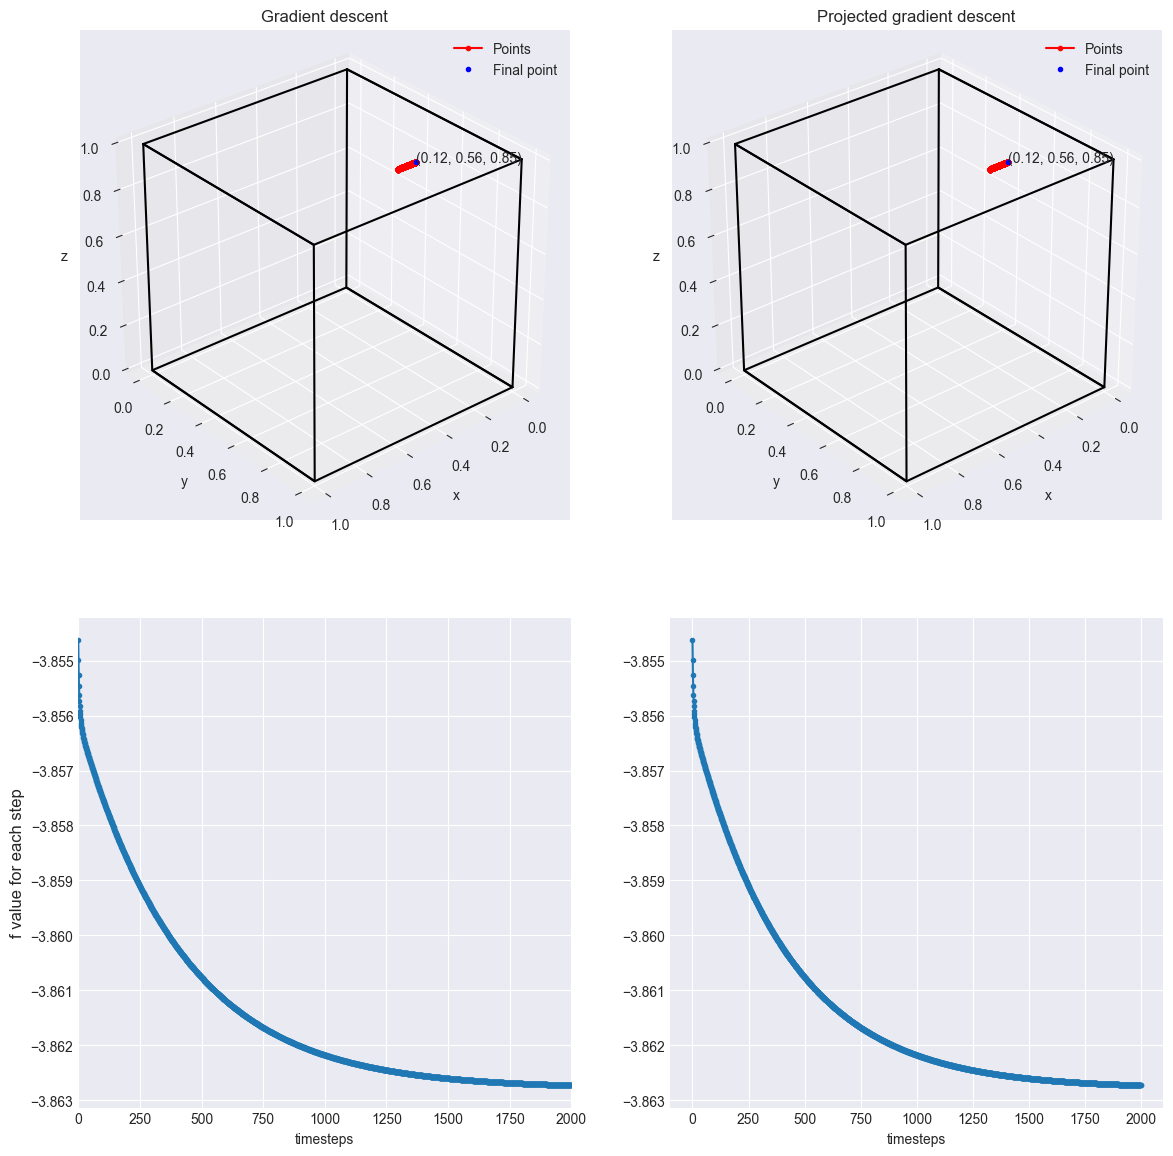

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
z1 = np.array([0.22,0.56,0.85])
gamma = 0.001
T = 2000

create_subplots(z1, a, c, p, T, gamma)